## Telecommunication Case Study

Business Understanding

The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. Three main strategies have been proposed to generate more revenues: 
1. Acquire new customers 
2. Upsell the existing customers
3. Increase the retention period of customers 
However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy, proving that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as "the customer movement from one provider to another".

Customer churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent a potentially large additional revenue source if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.

Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide. Even though it is not the most fun to look at, customer churn metrics can help businesses improve customer retention.



## Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('churn_dataset.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['Churn'].value_counts(normalize =True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

The churn rate, also known as the rate of attrition, is the percentage of subscribers to a service who discontinue their subscriptions to that service within a given time period.

In [4]:
df = df.drop('customerID',axis = 1)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 20)

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:

df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
num = df.select_dtypes(include='number')
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [13]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

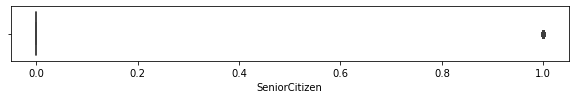

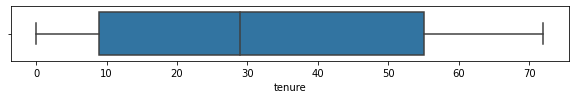

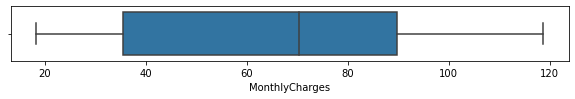

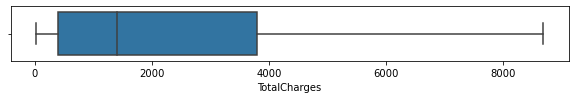

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in num:
    plt.figure(figsize=(10,1))
    sns.boxplot(data = num,x = i)

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [16]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
#Remove outlier
q1 = df['SeniorCitizen'].quantile(0.25)
q3 = df['SeniorCitizen'].quantile(0.75)
IQR = q3 - q1
lb = q1-(1.5*IQR)
ub = q3+(1.5*IQR)
outlier = df[(df['SeniorCitizen'] < lb) | (df['SeniorCitizen'] > ub)].index
df.drop(outlier,inplace =True)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# sorting the data based on one feature

df.sort_values(by='TotalCharges', ascending=False).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


In [20]:
#applying max function to each column.

df.apply(np.max)

gender                      Male
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                        72
PhoneService                 Yes
MultipleLines                Yes
InternetService               No
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges            118.75
TotalCharges              8684.8
Churn                        Yes
dtype: object

In [21]:
pd.crosstab(df['Churn'], df['InternetService'])

InternetService,DSL,Fiber optic,No
Churn,,,
No,1781,1361,1366
Yes,381,904,108


In [22]:
pd.crosstab(df['Churn'], df['PaymentMethod'])

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1106,1131,1017,1254
Yes,205,170,754,264


## Univariate Analysis


array([[<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

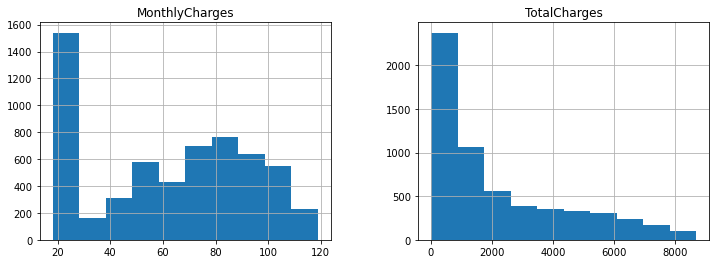

In [23]:
#Histogram
df[['MonthlyCharges','TotalCharges']].hist(figsize=(12,4))

#OBSERVATION :
In the above plot, we see that the both the variable TotalCharges and MonthlyCharges are skewed right. 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

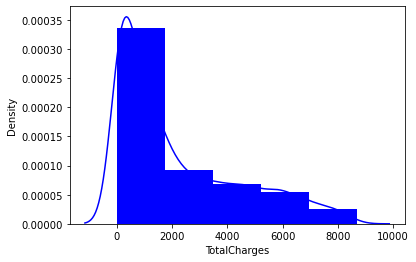

In [24]:
#Histogram and kde
sns.distplot(df['TotalCharges'],kde =True,color='b',bins =5,hist_kws={'alpha':1})

- The density of TotalCharges, between 20 to 1500 is high.

In [25]:
df['Churn'].value_counts()

No     4508
Yes    1393
Name: Churn, dtype: int64

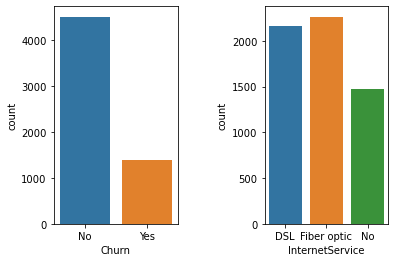

In [26]:
# subplot(nrows, ncols, index, **kwargs)
plt.figure(1)

plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(121)
sns.countplot(x='Churn', data=df)

plt.subplot(122)
sns.countplot(x='InternetService', data=df)

plt.show()


-The left chart above vividly illustrates the imbalance in our target variable.     
-The bar plot for Internetservice calls on the right gives a hint that the majority of customers use fiber optics.

## Bivariate Analysis

<AxesSubplot:xlabel='InternetService', ylabel='count'>

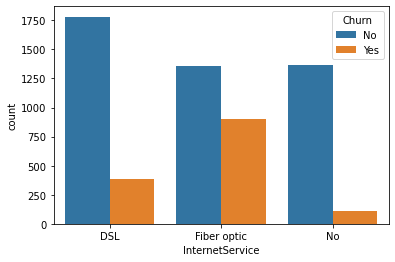

In [27]:
sns.countplot(x='InternetService', data=df, hue='Churn')

- we see that churn rate is heigher with Fiber optics. 

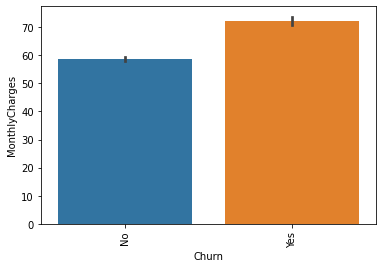

In [28]:
sns.barplot(x = 'Churn',y = 'MonthlyCharges', data = df)
plt.xticks(rotation = 90)
plt.show()

Churn rate is heigher with high monthlycharge.

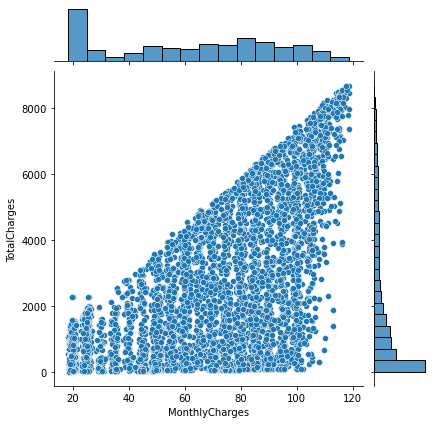

In [29]:
sns.jointplot(x='MonthlyCharges', y='TotalCharges',\
              data=df, kind='scatter')

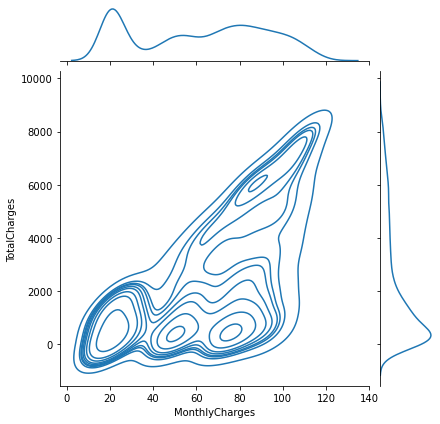

In [30]:
sns.jointplot(x='MonthlyCharges', y='TotalCharges',\
              data=df, kind='kde')

## Multivariate Analysis

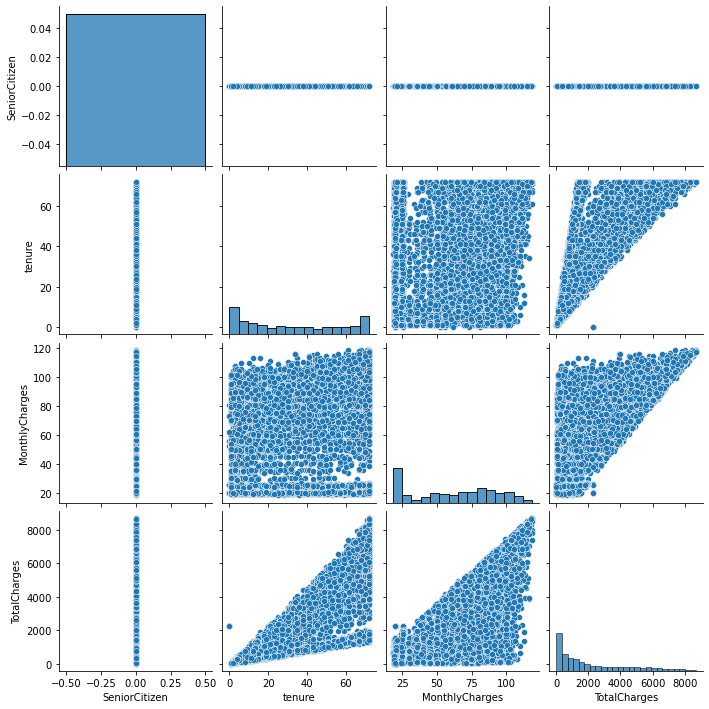

In [31]:
sns.pairplot(df)

In [32]:
num_corr = num.corr()

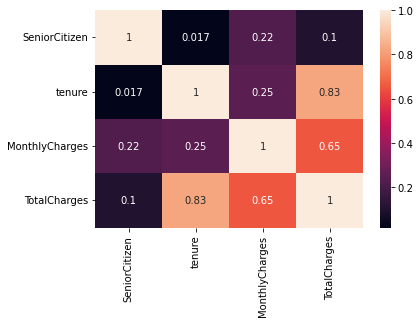

In [33]:
sns.heatmap(num_corr,annot=True)
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


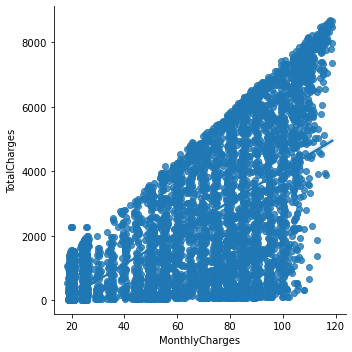

In [34]:
sns.lmplot('MonthlyCharges', 'TotalCharges', data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


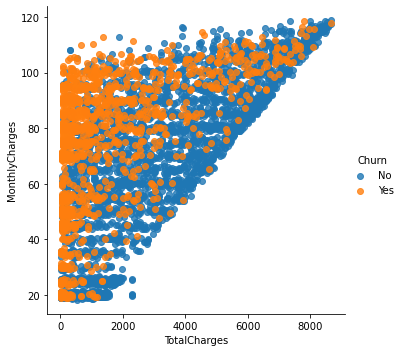

In [35]:
sns.lmplot('TotalCharges', 'MonthlyCharges', data=df,\
          hue='Churn', fit_reg=False)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

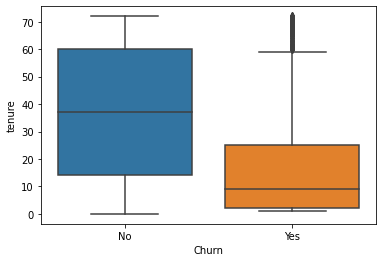

In [36]:
sns.boxplot(x='Churn', y='tenure', data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


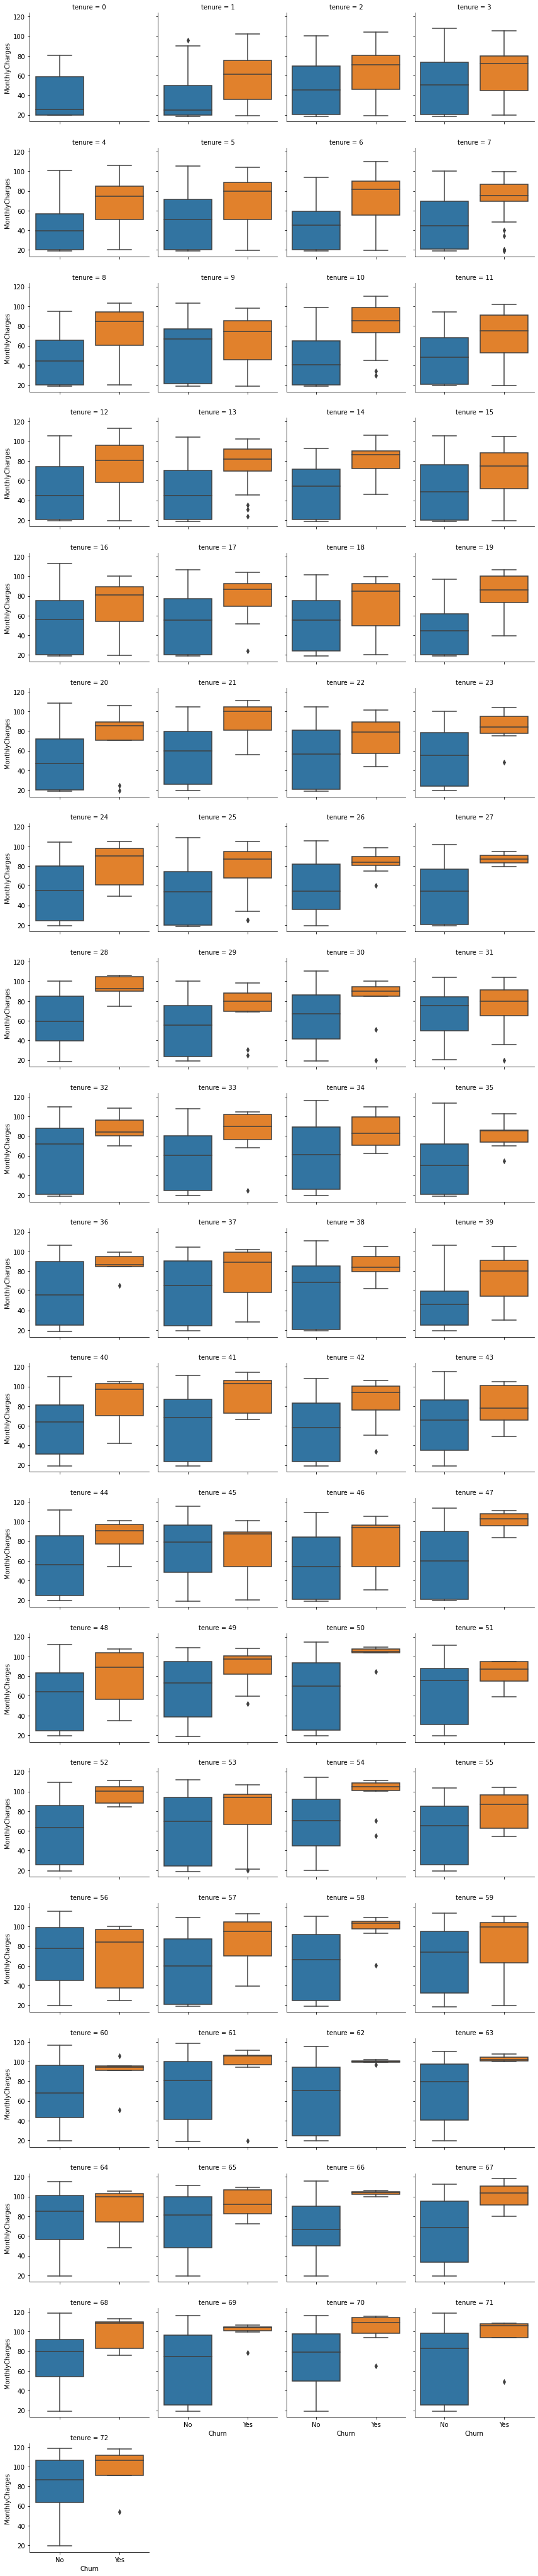

In [37]:
sns.factorplot(x='Churn', y='MonthlyCharges', col='tenure', \
              data=df, kind='box', col_wrap=4, size=3)

### Summary

- Churn rate is heigher with Fiber optics.
- Churn rate is heigher with higher monthlycharge.

### Implementation of ML Model

In [38]:
#Seggregate input and output
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = df[['Churn']]   


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4425, 19) (4425, 1)
(1476, 19) (1476, 1)


In [40]:
X_train_num = X_train.select_dtypes(include=['int','float'])
X_train_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4764,0,2,45.15,98.50
4503,0,17,94.40,1617.50
6281,0,6,20.60,116.60
859,0,72,64.80,4719.75
5916,0,72,112.75,8192.60
...,...,...,...,...
2244,0,34,64.40,2088.75
423,0,44,25.70,1110.50
93,0,65,111.05,7107.00
4662,0,22,20.15,432.50


In [41]:
X_train_cat = X_train.select_dtypes(exclude=['int','float'])
X_train_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4764,Male,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
4503,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check
6281,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
859,Male,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
5916,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,Female,No,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check
423,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
93,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
4662,Male,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_ss = pd.DataFrame(scaler.fit_transform(X_train_num,y_train),
                              columns = X_train_num.columns,
                              index =X_train_num.index)
X_train_num_ss

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4764,0.0,-1.215630,-0.546851,-0.928841
4503,0.0,-0.608136,1.081306,-0.247901
6281,0.0,-1.053632,-1.358450,-0.920727
859,0.0,1.619346,0.102759,1.142782
5916,0.0,1.619346,1.687939,2.699599
...,...,...,...,...
2244,0.0,0.080359,0.089535,-0.036648
423,0.0,0.485355,-1.189849,-0.475180
93,0.0,1.335848,1.631739,2.212944
4662,0.0,-0.405637,-1.373326,-0.779115


In [43]:
X_train_cat.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop ='first',sparse = False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4764,Male,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
4503,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check
6281,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
859,Male,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
5916,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,Female,No,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check
423,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
93,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
4662,Male,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)


In [45]:
X_train_transformed = pd.concat([X_train_num_ss, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4764,0.0,-1.215630,-0.546851,-0.928841,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4503,0.0,-0.608136,1.081306,-0.247901,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6281,0.0,-1.053632,-1.358450,-0.920727,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
859,0.0,1.619346,0.102759,1.142782,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
5916,0.0,1.619346,1.687939,2.699599,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [46]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2816,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.55,8165.10
1321,Male,0,Yes,Yes,60,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),65.85,3928.30
1455,Female,0,Yes,No,36,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),106.05,3834.40
6526,Male,0,No,Yes,49,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),100.60,5069.65
2227,Male,0,Yes,Yes,58,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.55,1108.80


In [47]:
X_test_num = X_test.select_dtypes(include =['int','float'])
X_test_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2816,0,72,109.55,8165.10
1321,0,60,65.85,3928.30
1455,0,36,106.05,3834.40
6526,0,49,100.60,5069.65
2227,0,58,19.55,1108.80
...,...,...,...,...
4724,0,50,80.05,4042.20
4848,0,5,93.90,486.85
3363,0,57,57.50,3265.95
1134,0,26,81.95,2070.05


In [48]:
X_test_cat = X_test.select_dtypes(exclude =['int','float'])
X_test_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2816,Female,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check
1321,Male,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic)
1455,Female,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic)
6526,Male,No,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic)
2227,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,Female,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic)
4848,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check
3363,Male,Yes,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1134,Female,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check


In [49]:
X_test_num_ss = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_ss.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2816,0.0,1.619346,1.582150,2.687271
1321,0.0,1.133350,0.137471,0.787990
1455,0.0,0.161358,1.466444,0.745896
6526,0.0,0.687854,1.286272,1.299636
2227,0.0,1.052350,-1.393162,-0.475942


In [50]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2816,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1321,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1455,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
6526,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2227,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4848,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3363,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1134,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_test_transformed = pd.concat([X_test_num_ss, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2816,0.0,1.619346,1.582150,2.687271,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1321,0.0,1.133350,0.137471,0.787990,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1455,0.0,0.161358,1.466444,0.745896,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
6526,0.0,0.687854,1.286272,1.299636,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2227,0.0,1.052350,-1.393162,-0.475942,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [60]:
# Building of model
#logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_test_predict)
a


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.809620596205962

In [54]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
b = accuracy_score(y_test,y_test_predict)
b

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.785230352303523

In [55]:
#Decision-Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
c = accuracy_score(y_test,y_test_predict)
c

0.7459349593495935

In [56]:
#Support-vector Classifier
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
d = accuracy_score(y_test,y_test_predict)
d

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8089430894308943

In [63]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
e = accuracy_score(y_test_predict,y_test)
e

C:\Users\dell\AppData\Local\Temp\ipykernel_8676\4225766962.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_transformed,y_train)


0.7981029810298103

In [64]:
df2 = pd.DataFrame({'Model':['Logistic Regression','KNN','Decision-Tree classifier','Support-vector Classifier','RandomForest Classifier'],'Accuracy_score':[a,b,c,d,e]})
df2

,Model,Accuracy_score
0,Logistic Regression,0.809621
1,KNN,0.785230
2,Decision-Tree classifier,0.745935
3,Support-vector Classifier,0.808943
4,RandomForest Classifier,0.798103


<AxesSubplot:xlabel='Accuracy_score', ylabel='Model'>

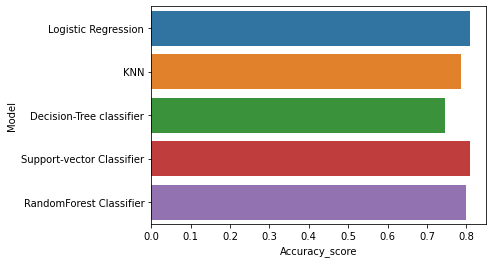

In [65]:
sns.barplot(y= df2.Model,x=df2.Accuracy_score)

## Conclusion :


- 'Logistic Regression' algorithm is the best model for  Customer Churn prediction data-set as it is giving maximum 'Accuracy-score'.